In [1]:
#libs <- c("data.table", "tidyverse", "dlpyr", "ggpubr", "glmnet","caret","factoextra","Metrics","
#readr","gplots","ROCR","readxl","e1071","ggplot2","reshape2","gridExtra","ggcorrplot")

#####have to install "SciencesPo" - separately tar.gz #####

#for(i in libs) {

#install.packages(i)
#}


library(base)
library(data.table)
library(tidyverse)
#library(devtools)
#library(car)
library(ggpubr)
library(glmnet)
#library(summarytools)
#library(knitr)
#library(htmltools)
#library(corrplot)
library(caret)
library(factoextra)
library(Metrics)
library(readr)
library(gplots)
library(dplyr)
#library(stringr)
library(ROCR)
library(readxl)
library(e1071)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggcorrplot)
library(SciencesPo);

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()
Warning message:
“package ‘ggpubr’ was built under R version 3.5.2”Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required pa

In [2]:

X_data_numeric2 <- read_csv("/Users/laura/FinalDatasetPS14.csv")  #### change this


X_data_numeric <- X_data_numeric2[,-c(dim(X_data_numeric2)[2])]


Names <- names(X_data_numeric)

X_data_numeric  <- data.frame(apply(X_data_numeric, 2, as.numeric))

table(is.na(X_data_numeric))

str(X_data_numeric)

for(i in 1:ncol(X_data_numeric)){
  X_data_numeric[is.na(X_data_numeric[,i]), i] <- min(data.matrix(X_data_numeric[,i]), na.rm = TRUE)
    #or median
}

NAscol1 <- data.frame(colSums(is.na(X_data_numeric)))


X_data_scaled <-data.frame(scale(X_data_numeric))


All2 <- data.frame(X_data_scaled, as.factor(X_data_numeric2$Label))
names(All2) <- c(Names,"Label")

print("Final normalized and imputed dataset ")
head(All2)

table(is.na(All2))




Parsed with column specification:
cols(
  .default = col_integer(),
  PS14 = col_double(),
  `WBC [109/L]_T1` = col_double(),
  `NEUT [109/L]_T1` = col_double(),
  `LYMPH [109/L]_T1` = col_double(),
  `MONO [109/L]_T1` = col_double(),
  `IG [109/L]_T1` = col_double(),
  `NEUT %_T1` = col_double(),
  `LYMPH %_T1` = col_double(),
  `MONO %_T1` = col_double(),
  `IG %_T1` = col_double(),
  `Increase_CD11b + fMLF (MedFI)_T1` = col_double(),
  `Decrease_CD62L + FMLF (MedFI)_T1` = col_double(),
  `% CD16BRIGHT CD62LDIM_T1` = col_double(),
  `CD16BRIGHT CD62LDIM [106/L]_T1` = col_double(),
  `% CD14+ 16-_T1` = col_double(),
  `% CD14+ 16+_T1` = col_double(),
  `% CD14+ HLA-DRLow/Neg_T1` = col_double(),
  `CD14+ HLA-DRLow/Neg (x106/L)_T1` = col_double(),
  `IL1-Ra_T1` = col_double(),
  `IL-6_T1` = col_double()
  # ... with 58 more columns
)
See spec(...) for full column specifications.



FALSE  TRUE 
10319  1637 

'data.frame':	61 obs. of  196 variables:
 $ ISS                             : num  11 9 14 4 24 10 16 9 20 16 ...
 $ NISS                            : num  11 22 17 12 34 11 29 18 29 16 ...
 $ PS14                            : num  97.2 99.6 99.1 99.9 87.3 ...
 $ Age                             : num  41 22 47 38 78 32 45 19 27 26 ...
 $ WBC..109.L._T1                  : num  26.16 8.28 9.24 11.54 17.43 ...
 $ NEUT..109.L._T1                 : num  21.95 4.21 4.52 6.37 12.48 ...
 $ LYMPH..109.L._T1                : num  1.6 3.53 3.73 4.18 3.46 3.57 9.96 2.15 5.75 3.83 ...
 $ MONO..109.L._T1                 : num  2.58 0.33 0.45 0.65 1.1 0.53 1.18 0.51 0.73 0.66 ...
 $ IG..109.L._T1                   : num  0.1 0.04 0.16 0.09 0.38 0.19 0.33 0.01 0.06 0.09 ...
 $ NEUT.._T1                       : num  83.9 50.9 49 55.2 71.7 44.1 40.5 63.2 42.1 64.1 ...
 $ LYMPH.._T1                      : num  6.1 42.6 40.3 36.2 19.8 46.1 50.4 28.5 49.6 29.7 ...
 $ MONO.._T1                       : num  

ISS        NISS       PS14      Age         WBC [109/L]_T1 NEUT [109/L]_T1
1 -1.0464636 -1.3838429 0.6694777  0.02292171  2.1290636      2.8295744     
2 -1.1791752 -0.8027674 0.7725172 -0.96101381 -0.9361674     -0.8048849     
3 -0.8473962 -1.0668926 0.7511861  0.33363819 -0.7715913     -0.7413741     
4 -1.5109542 -1.3310178 0.7834649 -0.13243653 -0.3772942     -0.3623578     
5 -0.1838382 -0.1688669 0.2418910  1.93900666  0.6324491      0.8894205     
6 -1.1128194 -1.3838429 0.7344444 -0.44315301 -1.0287415     -0.9667352     
  LYMPH [109/L]_T1 MONO [109/L]_T1 IG [109/L]_T1 NEUT %_T1   ⋯ Eff_Mem_Cyto_T3
1 -1.3981345        3.7586484      -0.4697766     1.92180514 ⋯  0.4253299     
2 -0.4411996       -1.1094699      -0.7030714    -0.34092735 ⋯ -0.4511945     
3 -0.3420354       -0.8498369      -0.2364818    -0.47120589 ⋯ -0.9576309     
4 -0.1189158       -0.4171153      -0.5086591    -0.04608645 ⋯ -0.3538029     
5 -0.4759071        0.5565084       0.6189323     1.08527979 ⋯  0.2110684     
6 -0.4213667       -0.6767482      -0.1198345    -0.80718738 ⋯ -0.5680645     
  IL1-Ra_T3  IL-6_T3    IL-8_T3      IL-10_T3    G-CSF_T3   MCP-1_T3  
1 -0.4717103 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585
2 -0.1280406 -0.2938123  0.073726841  0.01478357 -0.1414413 -0.4152482
3 -0.2352173 -0.3715281 -0.005590231  0.43054469 -0.1531610 -0.4272585
4  2.4639616  2.1731424  1.329943099  7.57598291  0.4075845  2.2686327
5 -0.4717103 -0.4277698 -0.503151559 -0.19433802 -0.3404883 -0.4272585
6 -0.3879266 -0.3690971 -0.431449718 -0.16970279 -0.3010821 -0.3147455
  TNF-A_T3    Cortisol (ng/ml)_T3 Label
1 -0.30944049  0.2192912          N    
2 -0.21377984 -0.3116227          Y    
3 -0.01629675  0.2249514          N    
4  5.14876658  0.3775903          N    
5 -0.30944049  1.1099962          Y    
6 -0.18519963 -0.2967703          N


FALSE  TRUE 
11956    61 

# Introduce final betas for the three time points here

In [3]:

Betas_select <- data.frame(All2$NISS,All2$'MONO %_T1',All2$'CD63 (MedFI)_T3',All2$'Decrease_CD62L + FMLF (MedFI)_T3')


Betas_select["Label"]<- All2$Label

names(Betas_select) <- c("NISS","First Time Monocytes %","Third Time CD63 (MedFI)","Third Time Decrease in CD62L after FMLF (MedFI)", "Label")

#names(Betas_select) <- c("PS14","First Time Monocytes %","Third Time Decrease in CD62L after FMLF (MedFI)","Third Time HLA-DR (MedFI)", "Label")


Betas_select2 <- Betas_select

head(Betas_select2)

NISS       First Time Monocytes % Third Time CD63 (MedFI)
1 -1.3838429  1.60389375            0.09697724             
2 -0.8027674 -1.02732594            0.29728126             
3 -1.0668926 -0.58878932            1.60334526             
4 -1.3310178 -0.28181369            0.78322291             
5 -0.1688669  0.02516194            0.07551609             
6 -1.3838429  0.33213757            0.07500511             
  Third Time Decrease in CD62L after FMLF (MedFI) Label
1  0.47460485                                     N    
2 -0.24538442                                     Y    
3 -0.04596122                                     N    
4 -0.88608111                                     N    
5 -0.57745420                                     Y    
6  1.32737483                                     N

NISS       First Time Monocytes % Third Time CD63 (MedFI)
1 -1.3838429  1.60389375            0.09697724             
2 -0.8027674 -1.02732594            0.29728126             
3 -1.0668926 -0.58878932            1.60334526             
4 -1.3310178 -0.28181369            0.78322291             
5 -0.1688669  0.02516194            0.07551609             
6 -1.3838429  0.33213757            0.07500511             
  Third Time Decrease in CD62L after FMLF (MedFI) Label
1  0.47460485                                     N    
2 -0.24538442                                     Y    
3 -0.04596122                                     N    
4 -0.88608111                                     N    
5 -0.57745420                                     Y    
6  1.32737483                                     N

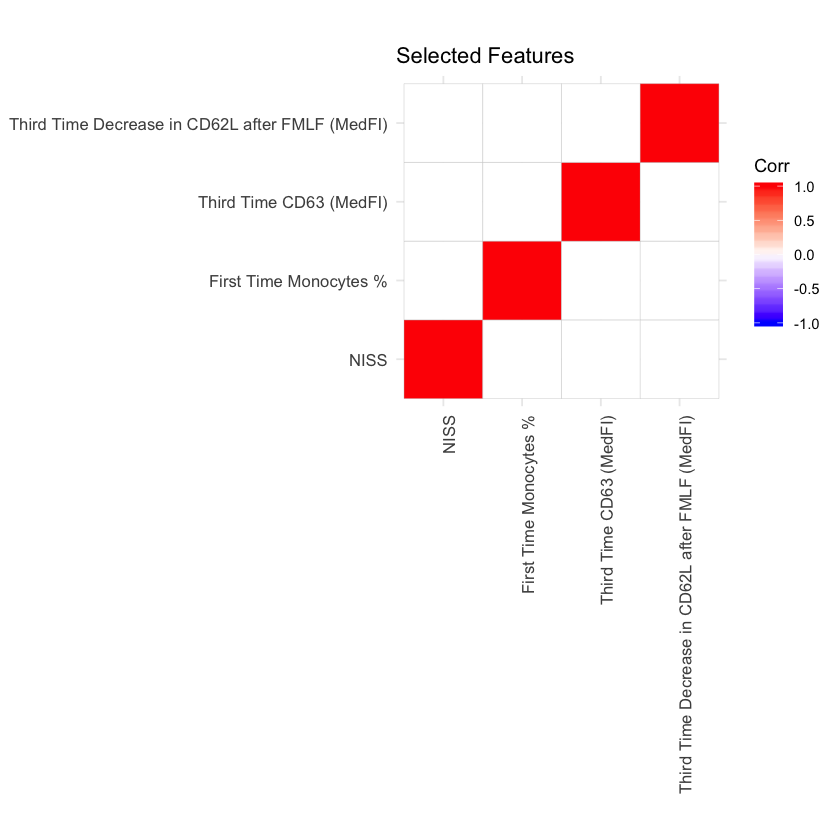

In [4]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))




In [5]:

NumVar <- length(Betas_select)
names <-colnames(Betas_select)
names1 <- as.character(names)

names1 <- strsplit(names1,", ")
names <- as.data.frame(names1)

N <- 1000

multipleAUC<-matrix(rnorm(2),1,N) 
  multipleAUCR<-matrix(rnorm(2),1,N) 
  multipleAUCNB<-matrix(rnorm(2),1,N) 
  multipleAUCNBR<-matrix(rnorm(2),1,N) 
  
  multipleROC<-matrix(as.list(rnorm(2)),1,N)  
  multipleROCR<-matrix(as.list(rnorm(2)),1,N)  
  multipleNBROC<-matrix(as.list(rnorm(2)),1,N) 
  multipleNBROCR<-matrix(as.list(rnorm(2)),1,N) 
  
  singleROC<-list()
  doubleROC<-list()
  singleROCR<-list()
  doubleROCR<-list()
  
  doublePlus<-list()
  singlePlus<-list()
  
  singleAUC<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUC<-matrix(rnorm(2),(NumVar-1),N) 
  singleAUCR<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUCR<-matrix(rnorm(2),(NumVar-1),N)
  
  doubleAUCSVMR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVM<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNBR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNB<-matrix(rnorm(2),(NumVar-1),N) 
  
  MatsingleROC<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatsingleROCR<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatdoubleROC<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  MatdoubleROCR<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  
  MatsinglePlus<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlus<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  MatsinglePlusR<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlusR<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  multiplePlus<-matrix(as.list(rnorm(2)),1,N)
  multiplePlusR<-matrix(as.list(rnorm(2)),1,N)

set.seed(132)

source("/Users/laura/Documents/PhD/R/PipelineAll/FunctionsAUC.R")

print("loaded")

[1] "loaded"


In [9]:
for (j in 1:N){ #N different measurements of AUC values, mean done at the end. 
  
  smp_size <- floor(0.65 * nrow(Betas_select2))
  #set.seed(907)
  train_ind <- sample(seq_len(nrow(Betas_select2)), size = smp_size)
  
  # Training set
  train <- Betas_select2[train_ind, ]
  
  # Test set
  test <- Betas_select2[-train_ind, ]
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]
  
  multipleAUCNB[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUC[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROC[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  
  multipleROC[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  multiplePlus[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  #separate
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUC[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROC[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlus[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROC[,j] <- matrix(singleROC)
  
  
  #Null Hypothesis #### 
  
  
  # Training set
  
  train$Label <- sample(train$Label)
  test$Label <- sample(test$Label)
  #Permuted data, will make sure that are models are really valid as randomizing the label should yield around 0.5 AUC values. The same testing and training arrangements for the real per model are used. 
  
  # Test set
  
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]

  
  multipleAUCNBR[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUCR[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  multiplePlusR[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROCR[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  multipleROCR[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUCR[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROCR[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlusR[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROCR[,j] <- matrix(singleROCR)
  
    print(j)
}

print("done");



[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 61
[1] 62
[1] 63
[1] 64


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 95


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 107
[1] 108
[1] 109
[1] 110


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1] 140


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 141
[1] 142
[1] 143
[1] 144
[1] 145
[1] 146
[1] 147
[1] 148
[1] 149
[1] 150
[1] 151
[1] 152
[1] 153


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 154


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 155
[1] 156
[1] 157
[1] 158
[1] 159
[1] 160
[1] 161
[1] 162
[1] 163
[1] 164
[1] 165
[1] 166


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 167
[1] 168
[1] 169
[1] 170
[1] 171
[1] 172


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 173
[1] 174


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 175
[1] 176
[1] 177
[1] 178
[1] 179
[1] 180
[1] 181
[1] 182
[1] 183
[1] 184
[1] 185


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 186
[1] 187
[1] 188
[1] 189
[1] 190
[1] 191
[1] 192
[1] 193
[1] 194
[1] 195
[1] 196
[1] 197
[1] 198
[1] 199
[1] 200
[1] 201
[1] 202
[1] 203
[1] 204
[1] 205


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 206
[1] 207
[1] 208
[1] 209
[1] 210
[1] 211
[1] 212


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 213
[1] 214
[1] 215
[1] 216
[1] 217
[1] 218
[1] 219
[1] 220
[1] 221
[1] 222
[1] 223
[1] 224
[1] 225
[1] 226
[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 236
[1] 237
[1] 238
[1] 239
[1] 240


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 241
[1] 242
[1] 243
[1] 244
[1] 245
[1] 246
[1] 247
[1] 248
[1] 249
[1] 250
[1] 251
[1] 252
[1] 253
[1] 254
[1] 255
[1] 256
[1] 257
[1] 258
[1] 259
[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270
[1] 271
[1] 272
[1] 273
[1] 274


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 275
[1] 276
[1] 277


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 278
[1] 279
[1] 280


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 281
[1] 282


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 290
[1] 291
[1] 292
[1] 293


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 294


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 295
[1] 296
[1] 297
[1] 298
[1] 299
[1] 300
[1] 301
[1] 302
[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319
[1] 320
[1] 321
[1] 322
[1] 323
[1] 324
[1] 325
[1] 326
[1] 327
[1] 328
[1] 329
[1] 330
[1] 331
[1] 332
[1] 333
[1] 334
[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 341
[1] 342
[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349
[1] 350
[1] 351
[1] 352
[1] 353
[1] 354
[1] 355
[1] 356
[1] 357
[1] 358
[1] 359
[1] 360
[1] 361


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 362
[1] 363
[1] 364
[1] 365
[1] 366
[1] 367
[1] 368
[1] 369
[1] 370
[1] 371
[1] 372
[1] 373
[1] 374
[1] 375
[1] 376
[1] 377
[1] 378
[1] 379
[1] 380
[1] 381
[1] 382
[1] 383
[1] 384
[1] 385
[1] 386
[1] 387
[1] 388
[1] 389
[1] 390
[1] 391
[1] 392
[1] 393
[1] 394
[1] 395
[1] 396
[1] 397
[1] 398
[1] 399
[1] 400
[1] 401


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 402
[1] 403
[1] 404
[1] 405


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 406
[1] 407
[1] 408
[1] 409
[1] 410


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 411
[1] 412
[1] 413
[1] 414
[1] 415
[1] 416
[1] 417
[1] 418
[1] 419
[1] 420
[1] 421
[1] 422
[1] 423
[1] 424
[1] 425
[1] 426
[1] 427
[1] 428
[1] 429
[1] 430
[1] 431
[1] 432
[1] 433
[1] 434
[1] 435
[1] 436
[1] 437
[1] 438
[1] 439
[1] 440
[1] 441
[1] 442
[1] 443
[1] 444
[1] 445
[1] 446
[1] 447


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 448
[1] 449
[1] 450
[1] 451
[1] 452
[1] 453
[1] 454
[1] 455
[1] 456
[1] 457


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 458
[1] 459
[1] 460


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 461
[1] 462
[1] 463
[1] 464
[1] 465
[1] 466
[1] 467
[1] 468
[1] 469
[1] 470
[1] 471
[1] 472
[1] 473
[1] 474
[1] 475
[1] 476
[1] 477
[1] 478
[1] 479
[1] 480
[1] 481
[1] 482
[1] 483
[1] 484
[1] 485
[1] 486
[1] 487
[1] 488
[1] 489
[1] 490
[1] 491
[1] 492
[1] 493
[1] 494
[1] 495
[1] 496
[1] 497
[1] 498
[1] 499
[1] 500
[1] 501
[1] 502
[1] 503
[1] 504
[1] 505
[1] 506
[1] 507
[1] 508
[1] 509
[1] 510
[1] 511
[1] 512
[1] 513
[1] 514
[1] 515
[1] 516
[1] 517
[1] 518
[1] 519
[1] 520


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 521
[1] 522
[1] 523


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 524
[1] 525
[1] 526
[1] 527
[1] 528
[1] 529
[1] 530
[1] 531


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 532
[1] 533
[1] 534
[1] 535
[1] 536
[1] 537
[1] 538
[1] 539
[1] 540
[1] 541
[1] 542
[1] 543
[1] 544
[1] 545
[1] 546
[1] 547
[1] 548
[1] 549
[1] 550
[1] 551
[1] 552
[1] 553
[1] 554
[1] 555
[1] 556
[1] 557
[1] 558
[1] 559
[1] 560
[1] 561
[1] 562
[1] 563
[1] 564
[1] 565
[1] 566
[1] 567
[1] 568


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 569
[1] 570


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 571
[1] 572
[1] 573
[1] 574


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 575
[1] 576
[1] 577
[1] 578
[1] 579
[1] 580
[1] 581
[1] 582
[1] 583
[1] 584
[1] 585
[1] 586


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 587
[1] 588
[1] 589
[1] 590
[1] 591


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 592
[1] 593
[1] 594
[1] 595
[1] 596
[1] 597
[1] 598
[1] 599
[1] 600
[1] 601
[1] 602
[1] 603
[1] 604
[1] 605
[1] 606
[1] 607
[1] 608
[1] 609
[1] 610
[1] 611
[1] 612
[1] 613
[1] 614
[1] 615
[1] 616


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 617
[1] 618


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 619


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 620
[1] 621
[1] 622
[1] 623


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 624
[1] 625
[1] 626
[1] 627
[1] 628
[1] 629
[1] 630
[1] 631
[1] 632
[1] 633


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 634
[1] 635
[1] 636
[1] 637
[1] 638
[1] 639


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 640
[1] 641
[1] 642
[1] 643
[1] 644
[1] 645
[1] 646
[1] 647
[1] 648
[1] 649
[1] 650
[1] 651
[1] 652
[1] 653
[1] 654
[1] 655
[1] 656
[1] 657
[1] 658
[1] 659
[1] 660
[1] 661


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 662
[1] 663
[1] 664
[1] 665
[1] 666
[1] 667
[1] 668
[1] 669


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 670
[1] 671
[1] 672
[1] 673
[1] 674
[1] 675
[1] 676
[1] 677
[1] 678
[1] 679
[1] 680
[1] 681
[1] 682
[1] 683
[1] 684
[1] 685
[1] 686
[1] 687
[1] 688


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 689
[1] 690
[1] 691
[1] 692


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 693


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 694
[1] 695
[1] 696
[1] 697
[1] 698
[1] 699
[1] 700
[1] 701
[1] 702


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 703
[1] 704
[1] 705


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 706
[1] 707
[1] 708


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 709
[1] 710
[1] 711
[1] 712
[1] 713
[1] 714
[1] 715
[1] 716
[1] 717
[1] 718
[1] 719
[1] 720
[1] 721
[1] 722
[1] 723
[1] 724
[1] 725
[1] 726
[1] 727
[1] 728
[1] 729
[1] 730
[1] 731
[1] 732
[1] 733
[1] 734
[1] 735
[1] 736
[1] 737
[1] 738
[1] 739
[1] 740
[1] 741
[1] 742
[1] 743
[1] 744
[1] 745
[1] 746
[1] 747
[1] 748
[1] 749
[1] 750
[1] 751
[1] 752
[1] 753
[1] 754
[1] 755
[1] 756


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 757
[1] 758
[1] 759
[1] 760
[1] 761
[1] 762
[1] 763
[1] 764
[1] 765
[1] 766
[1] 767
[1] 768
[1] 769
[1] 770
[1] 771
[1] 772
[1] 773
[1] 774
[1] 775
[1] 776
[1] 777
[1] 778
[1] 779
[1] 780
[1] 781
[1] 782
[1] 783
[1] 784


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 785
[1] 786
[1] 787
[1] 788
[1] 789
[1] 790
[1] 791
[1] 792
[1] 793
[1] 794


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 795
[1] 796
[1] 797


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 798
[1] 799
[1] 800
[1] 801
[1] 802


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 803


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 804


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 805
[1] 806
[1] 807
[1] 808
[1] 809
[1] 810
[1] 811


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 812
[1] 813
[1] 814
[1] 815
[1] 816
[1] 817
[1] 818
[1] 819
[1] 820
[1] 821
[1] 822
[1] 823
[1] 824
[1] 825
[1] 826
[1] 827
[1] 828
[1] 829
[1] 830
[1] 831
[1] 832
[1] 833
[1] 834
[1] 835
[1] 836


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 837
[1] 838
[1] 839
[1] 840
[1] 841
[1] 842
[1] 843
[1] 844
[1] 845
[1] 846
[1] 847
[1] 848
[1] 849
[1] 850
[1] 851
[1] 852
[1] 853
[1] 854
[1] 855


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 856
[1] 857
[1] 858
[1] 859


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 860


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 861
[1] 862
[1] 863
[1] 864
[1] 865
[1] 866
[1] 867
[1] 868
[1] 869
[1] 870
[1] 871
[1] 872
[1] 873
[1] 874
[1] 875
[1] 876
[1] 877
[1] 878
[1] 879
[1] 880
[1] 881
[1] 882
[1] 883
[1] 884
[1] 885


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 886
[1] 887
[1] 888
[1] 889
[1] 890
[1] 891
[1] 892
[1] 893
[1] 894
[1] 895
[1] 896
[1] 897
[1] 898


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 899
[1] 900
[1] 901


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 902
[1] 903
[1] 904
[1] 905
[1] 906
[1] 907
[1] 908
[1] 909
[1] 910
[1] 911
[1] 912
[1] 913
[1] 914
[1] 915
[1] 916
[1] 917
[1] 918
[1] 919
[1] 920
[1] 921


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 922
[1] 923
[1] 924


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 925
[1] 926
[1] 927
[1] 928
[1] 929
[1] 930
[1] 931
[1] 932
[1] 933
[1] 934
[1] 935
[1] 936
[1] 937
[1] 938
[1] 939


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 940
[1] 941
[1] 942
[1] 943
[1] 944
[1] 945
[1] 946


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 947
[1] 948
[1] 949
[1] 950
[1] 951


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 952
[1] 953
[1] 954
[1] 955
[1] 956
[1] 957
[1] 958
[1] 959
[1] 960
[1] 961
[1] 962
[1] 963
[1] 964
[1] 965
[1] 966


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 967
[1] 968
[1] 969
[1] 970
[1] 971
[1] 972
[1] 973
[1] 974
[1] 975
[1] 976
[1] 977
[1] 978
[1] 979


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 980


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 981
[1] 982
[1] 983
[1] 984
[1] 985
[1] 986
[1] 987
[1] 988
[1] 989
[1] 990
[1] 991
[1] 992
[1] 993


Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 994
[1] 995
[1] 996
[1] 997


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 998
[1] 999
[1] 1000
[1] "done"


In [12]:
#Inside the folder of interest - write WD here - a new folder called FigAUC will be created 

WD <- paste(path.expand("~"), "/Documents/PhD/R/PipelineAll/", sep="") ### change this 
setwd(WD)

dir.create(file.path(WD, "FigAUC"), showWarnings = FALSE)

trial <- NULL
test_name <- "Laura"

singleAUC <- as.data.frame(singleAUC)
singleAUC <- mutate(singleAUC, Means=rowMeans(singleAUC))
row.names(singleAUC) <- names(xtrain)

singleAUCR <- as.data.frame(singleAUCR)
singleAUCR <- mutate(singleAUCR, Means=rowMeans(singleAUCR))
row.names(singleAUCR) <- names(xtrain)

multipleAUCR <- as.data.frame(multipleAUCR)
multipleAUCR["Means"] <- rowMeans(as.data.frame(multipleAUCR))

multipleAUC <- as.data.frame(multipleAUC)
multipleAUC["Means"] <- rowMeans(as.data.frame(multipleAUC))

Final <- data.frame(Multi=t(multipleAUC),MultiRand=t(multipleAUCR) )
FinalMeans <- data.frame(Multi=multipleAUC$Means,MultiRand=multipleAUCR$Means )

MonoSingle <- plotAUCSingle(singleAUC, singleAUCR,NumVar,test_name)

names <-names(Betas_select2)
names1 <-as.character(names)
names1 <-strsplit(names1,", ")
names1 <-as.data.frame(names1)

MonoMultiple <- plotAUCMultiple(multipleAUC, multipleAUCR,2,test_name)

Total <- data.frame(Single=singleAUC$Means,SingleRandom=singleAUCR$Means)
m <-length(names)
rownames(Total) <- colnames(Betas_select)[1:(length(names)-1)]

summary(MonoMultiple)
head(singleAUC)
Final


      Mono                  Label     
 Min.   :0.1197   Model        :1000  
 1st Qu.:0.4956   Permuted data:1000  
 Median :0.7500                       
 Mean   :0.7076                       
 3rd Qu.:0.9275                       
 Max.   :1.0000                       

V1        V2        V3       
NISS                                            0.7083333 0.7916667 0.7187500
First Time Monocytes %                          0.7125000 0.4875000 0.7708333
Third Time CD63 (MedFI)                         0.7666667 0.8000000 0.7604167
Third Time Decrease in CD62L after FMLF (MedFI) 0.7375000 0.7583333 0.7760417
                                                V4        V5        V6       
NISS                                            0.7666667 0.7343750 0.7589286
First Time Monocytes %                          0.7833333 0.7395833 0.7008929
Third Time CD63 (MedFI)                         0.7750000 0.6770833 0.6696429
Third Time Decrease in CD62L after FMLF (MedFI) 0.7333333 0.9270833 0.6517857
                                                V7        V8        V9       
NISS                                            0.7350427 0.8208333 0.5165289
First Time Monocytes %                          0.6196581 0.6750000 0.8388430
Third Time CD63 (MedFI)                         0.6752137 0.6750000 0.5619835
Third Time Decrease in CD62L after FMLF (MedFI) 0.7307692 0.9166667 0.8181818
                                                V10       ⋯ V992      V993     
NISS                                            0.7083333 ⋯ 0.7685950 0.7905983
First Time Monocytes %                          0.7250000 ⋯ 0.5743802 0.7008547
Third Time CD63 (MedFI)                         0.7333333 ⋯ 0.6611570 0.7094017
Third Time Decrease in CD62L after FMLF (MedFI) 0.7500000 ⋯ 0.7355372 0.6452991
                                                V994      V995      V996     
NISS                                            0.6666667 0.6833333 0.6900826
First Time Monocytes %                          0.6324786 0.6708333 0.7479339
Third Time CD63 (MedFI)                         0.7264957 0.5916667 0.7851240
Third Time Decrease in CD62L after FMLF (MedFI) 0.7649573 0.7666667 0.6198347
                                                V997      V998      V999     
NISS                                            0.8500000 0.7735043 0.6538462
First Time Monocytes %                          0.7250000 0.5811966 0.9059829
Third Time CD63 (MedFI)                         0.7416667 0.8461538 0.6581197
Third Time Decrease in CD62L after FMLF (MedFI) 0.6333333 0.5641026 0.6495726
                                                V1000     Means    
NISS                                            0.5104167 0.7218593
First Time Monocytes %                          0.7708333 0.7216360
Third Time CD63 (MedFI)                         0.5312500 0.7050690
Third Time Decrease in CD62L after FMLF (MedFI) 0.7291667 0.7260258

Multi     MultiRand
V1    0.9583333 0.4250000
V2    0.8000000 0.2250000
V3    0.9375000 0.6354167
V4    0.9416667 0.2750000
V5    0.9479167 0.7187500
V6    0.9107143 0.4821429
V7    0.9316239 0.4017094
V8    1.0000000 0.6083333
V9    0.8677686 0.4628099
V10   0.9833333 0.5583333
V11   0.9285714 0.4821429
V12   0.9732143 0.5178571
V13   0.9333333 0.6833333
V14   0.7416667 0.5166667
V15   0.9316239 0.5641026
V16   0.9487179 0.4615385
V17   0.9090909 0.6776860
V18   0.9821429 0.7589286
V19   0.9586777 0.5041322
V20   0.9166667 0.3333333
V21   0.8750000 0.4107143
V22   1.0000000 0.3333333
V23   0.8119658 0.3333333
V24   0.8928571 0.5714286
V25   0.9833333 0.7583333
V26   0.9107143 0.5000000
V27   0.9428571 0.6285714
V28   0.9669421 0.5206612
V29   0.9669421 0.5371901
V30   1.0000000 0.3839286
⋮     ⋮         ⋮        
V972  0.9166667 0.7083333
V973  0.8974359 0.3760684
V974  0.9669421 0.4628099
V975  0.9017857 0.4821429
V976  0.9173554 0.6280992
V977  0.9090909 0.5206612
V978  0.9809524 0.3047619
V979  0.9316239 0.4957265
V980  0.8888889 0.8119658
V981  0.8125000 0.5535714
V982  1.0000000 0.4700855
V983  0.8500000 0.4083333
V984  0.9583333 0.3250000
V985  0.9142857 0.5142857
V986  0.8916667 0.5916667
V987  0.9658120 0.4017094
V988  0.9008264 0.5619835
V989  0.9416667 0.5000000
V990  0.9487179 0.5128205
V991  0.9586777 0.7603306
V992  0.9669421 0.6115702
V993  0.9316239 0.4786325
V994  0.7350427 0.5299145
V995  0.9583333 0.6250000
V996  0.9090909 0.4545455
V997  0.9250000 0.5250000
V998  0.7264957 0.6410256
V999  0.8888889 0.5042735
V1000 0.7812500 0.4791667
Means 0.9169838 0.4982129

                                                     Real Permuted_Data
NISS                                            0.7218593     0.4987154
First Time Monocytes %                          0.7216360     0.4910774
Third Time CD63 (MedFI)                         0.7050690     0.5019048
Third Time Decrease in CD62L after FMLF (MedFI) 0.7260258     0.5000617
Multivariate                                    0.9169838     0.4982129
                                                                                          Names
NISS                                                                                       NISS
First Time Monocytes %                                                   First Time Monocytes %
Third Time CD63 (MedFI)                                                 Third Time CD63 (MedFI)
Third Time Decrease in CD62L after FMLF (MedFI) Third Time Decrease in CD62L after FMLF (MedFI)
Multivariate                                                                       Multi

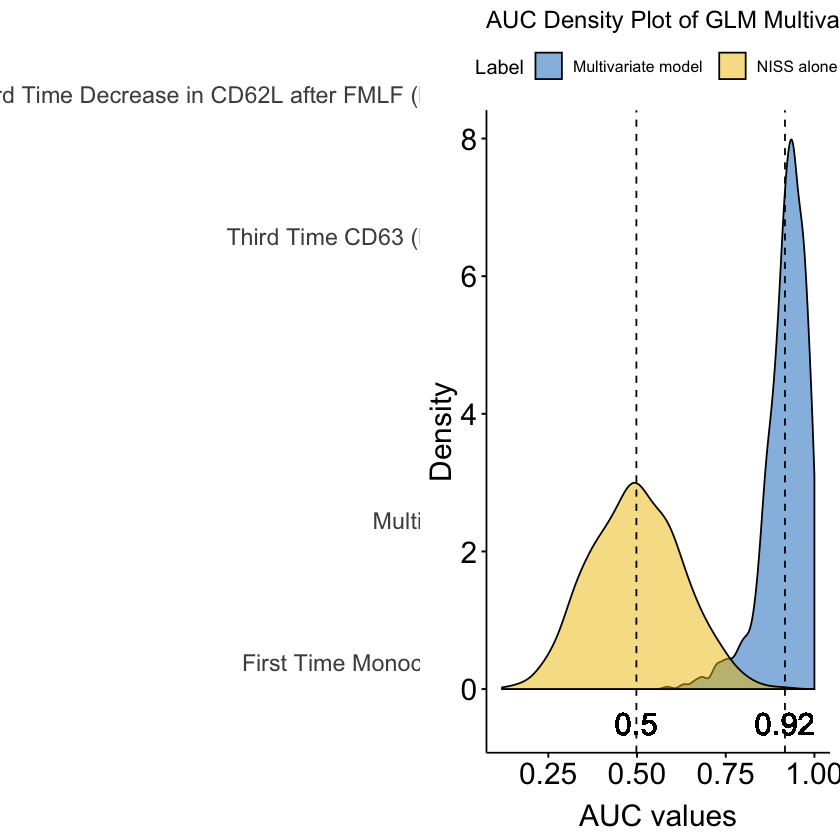

In [13]:
#Plots

MeansMultiple <- FinalMeans
MeansSingle <- Total[,c(1,2)]


colnames(MeansSingle) <- c("Real", "Permuted_Data")
Total <- rbind(MeansSingle, Multivariate=data.frame(Real=MeansMultiple$Multi,Permuted_Data=MeansMultiple$MultiRand))
Total["Names"]<- rownames(Total)

print(Total)

plot1 <- ggplot(Total, aes(y=Names, x=Permuted_Data,xend=Real))+geom_dumbbell(color="cornflowerblue", size=1.5, point.colour.l="goldenrod1")+theme(axis.text.x = element_text(angle = 90), axis.text=element_text(size=14),axis.title=element_text(size=18),strip.text.x = element_text(size = 8, colour = "black"),axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Selected Features")+xlim(0.4,1)
saveRDS(plot1, paste("Results/",test_name, "_Finalplot.rds"))


#multipleAUCR <- singleAUC[4,]
#row.names(multipleAUCR) <- NULL

val <- 2

Meanq <- data.frame(multipleAUC$Means,multipleAUCR$Means)
  MA <- data.frame(Mono=t(multipleAUC[1:dim(multipleAUC)[2]-1]))
 
  MAR<-data.frame(Mono=t(multipleAUCR[1:dim(multipleAUCR)[2]-1]))
 
  MA["Label"]<-as.factor(c(rep("Multivariate model",dim(MA)[1])))
  MAR["Label"]<-as.factor(c(rep("NISS alone",dim(MAR)[1])))
  
  Mono<-rbind(MA,MAR)
  
pp <-ggdensity(Mono, x = "Mono", fill = "Label", palette = "jco")+geom_vline(xintercept=Meanq[1,1],linetype = 2,color="black",show.legend = TRUE)+
    labs(title= paste("AUC Density Plot of GLM Multivariate Model"),y="Density",x="AUC values")+
    geom_text(aes(x=as.numeric(Meanq[1,1]),y=-0.5,label=signif(Meanq[1,1], digits = 2)),size=6.5)+
    geom_text(aes(x=as.numeric(Meanq[1,2]),y=-0.5,label=signif(Meanq[1,2], digits = 2)),size=6.5)
  
plot2 <- pp+geom_vline(xintercept=Meanq[1,2],linetype = 2,color="black",show.legend = TRUE)+theme(axis.text=element_text(size=18),axis.title=element_text(size=18),strip.text.x = element_text(size = 18, colour = "black"),
  axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Density")

#pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs1NISS.pdf",width=15, height=5)

save5 <- grid.arrange(arrangeGrob(plot1,plot2, ncol=2), ncol=1)

#graphics.off()



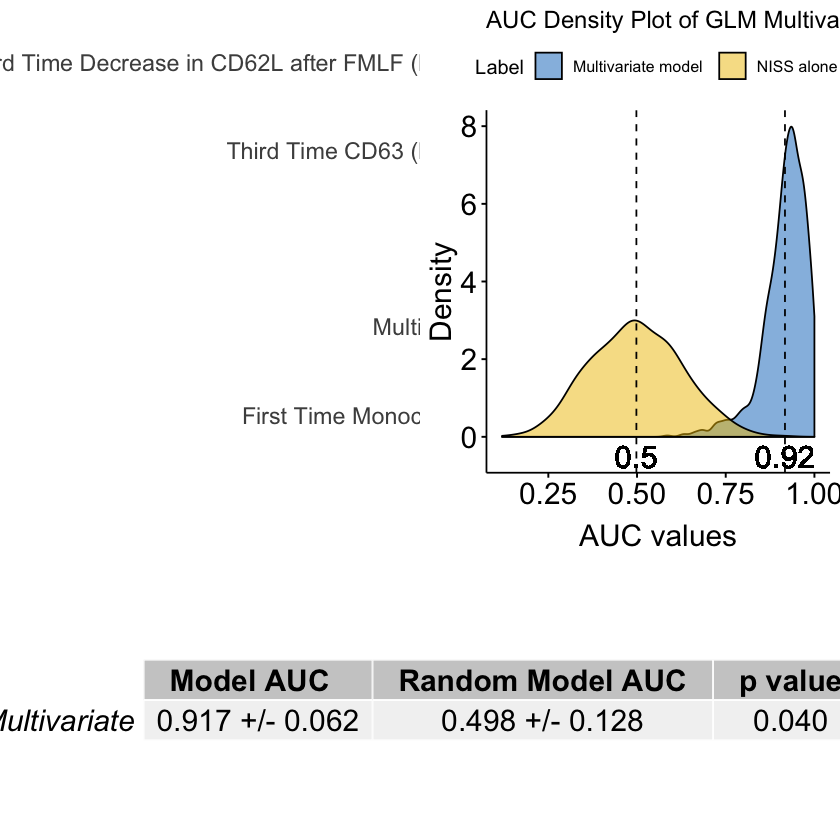

In [14]:
dd<- data.frame(Random=as.numeric(multipleAUCR[1,]),Normal=as.numeric(multipleAUC[1,]))
ddsd <- format(round(sd(dd$Random), 3), nsmall = 3)
ddsd2 <- format(round(sd(dd$Normal), 3), nsmall = 3)

count2 <- 0
count <- list()
gg <- 0 
ss <- 0


for (i in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
  ss <- ss+1 
  for (j in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
    gg <- gg+1
    if (dd$Random[i] > dd$Normal[j]){
      count2 <- count2 + 1
      
    }
  }
  count[i] <- count2
  count2 <- 0
}

s <- data.frame(table(as.numeric(count)))
pval <- length(s$Var1)/length(as.numeric(singleAUC[4,]))
pval <- format(round(pval, 3), nsmall = 3)

MeansMultiple$Multi <- format(round(as.numeric(MeansMultiple$Multi), 3), nsmall = 3)
MeansMultiple$MultiRand <- format(round(as.numeric(MeansMultiple$MultiRand), 3), nsmall = 3)



FinalVal <- paste(MeansMultiple$Multi,"+/-",ddsd2)
FinalValRand <- paste(MeansMultiple$MultiRand,"+/-",ddsd)
FinalTable<- data.frame(FinalVal,FinalValRand,pval)
rownames(FinalTable) <- c("Multivariate")
names(FinalTable) <- c("  Model AUC    ","  Random Model AUC  ","  p value  ")


mytheme <- gridExtra::ttheme_default(
  core = list(fg_params=list(cex = 1.5)),
  colhead = list(fg_params=list(cex = 1.5)),
  rowhead = list(fg_params=list(cex = 1.5)))

tbl <- tableGrob(FinalTable, theme=mytheme)

#pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs2NISS.pdf",width=13, height=6)

grid.arrange(save5, tbl,
             nrow=2,
             as.table=TRUE,
             heights=c(2,1))

#graphics.off()

# Introduce the data set time point here to analyze individually

NISS       First Time Monocytes % Third Time CD63 (MedFI)
1 -1.3838429  1.60389375            0.09697724             
2 -0.8027674 -1.02732594            0.29728126             
3 -1.0668926 -0.58878932            1.60334526             
4 -1.3310178 -0.28181369            0.78322291             
5 -0.1688669  0.02516194            0.07551609             
6 -1.3838429  0.33213757            0.07500511             
  Third Time Decrease in CD62L after FMLF (MedFI) Label
1  0.47460485                                     N    
2 -0.24538442                                     Y    
3 -0.04596122                                     N    
4 -0.88608111                                     N    
5 -0.57745420                                     Y    
6  1.32737483                                     N

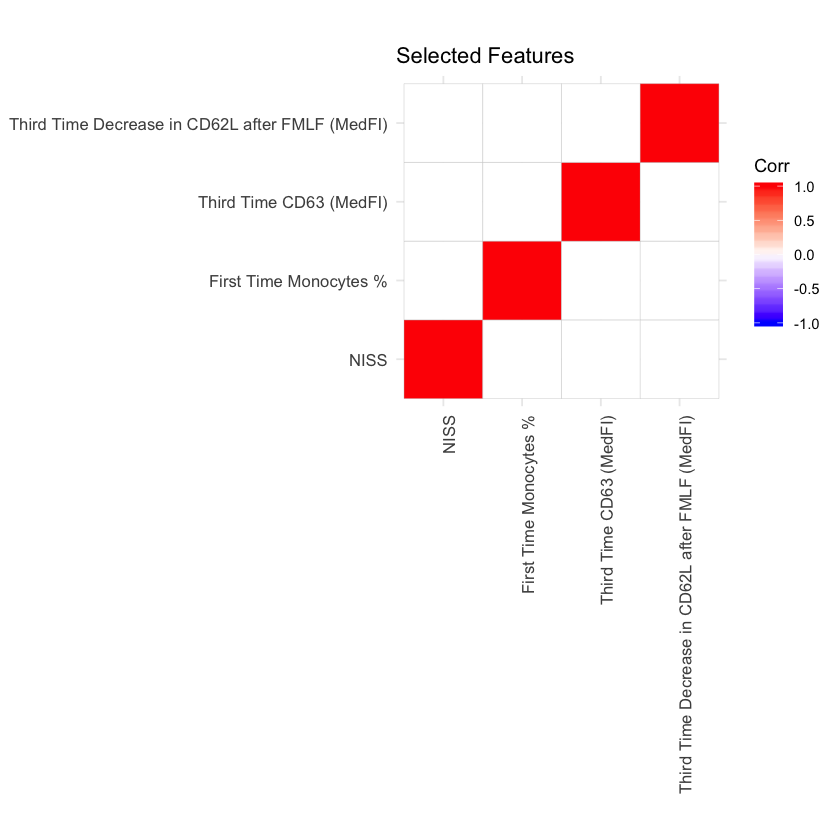

In [15]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))

